# Métodos Basados en Densidad - Ejercicios

---
Este cuaderno contiene ejercicios prácticos para consolidar los conceptos del Módulo 4.


## Configuración Inicial

Ejecuta esta celda antes de comenzar los ejercicios.

In [101]:
# Instalación de HDBSCAN
!pip install hdbscan -q

In [102]:
# Bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn
from sklearn.cluster import DBSCAN, OPTICS, KMeans, HDBSCAN
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.metrics import confusion_matrix

# HDBSCAN


# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Reproducibilidad
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("Configuración completada.")

Configuración completada.


---

## Ejercicio 1: Comprensión de los Conceptos de DBSCAN

### Contexto

Para comprender DBSCAN es fundamental entender los conceptos de epsilon-vecindad y la clasificación de puntos en núcleo, borde y ruido.

### Datos

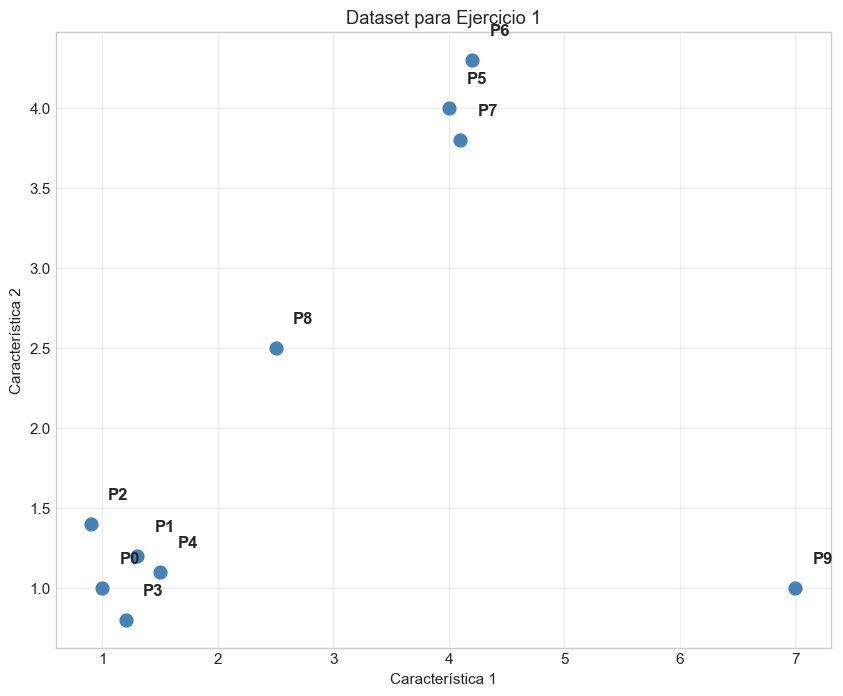

In [4]:
# Dataset pequeño para análisis manual
X_ej1 = np.array([
    [1.0, 1.0],   # P0
    [1.3, 1.2],   # P1
    [0.9, 1.4],   # P2
    [1.2, 0.8],   # P3
    [1.5, 1.1],   # P4
    [4.0, 4.0],   # P5
    [4.2, 4.3],   # P6
    [4.1, 3.8],   # P7
    [2.5, 2.5],   # P8 - punto intermedio
    [7.0, 1.0]    # P9 - outlier
])

# Visualización
plt.figure(figsize=(10, 8))
plt.scatter(X_ej1[:, 0], X_ej1[:, 1], c='steelblue', s=150, edgecolors='w', linewidths=2)
for i, (x, y) in enumerate(X_ej1):
    plt.annotate(f'P{i}', (x + 0.15, y + 0.15), fontsize=12, fontweight='bold')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Dataset para Ejercicio 1')
plt.grid(True, alpha=0.3)
plt.show()

### Tarea 1.1: Cálculo de Vecindades

Dado eps=0.6 y min_samples=3, calcule la epsilon-vecindad de cada punto y determine cuántos vecinos tiene cada uno.

In [5]:
# Parámetros
eps=0.49
min_samples = 3

# TODO: Calcular las vecindades usando NearestNeighbors
# Use radius_neighbors con el radio eps

# Su código aquí
nn=NearestNeighbors(radius=eps) # Reemplazar
nn.fit(X_ej1)

vecindades, indices = nn.radius_neighbors(X_ej1) ##nn.kneighbors te devuelve dos matrices es decir una tupla con dos arrays

vecindades = []

for i in range(len(X_ej1)):
    vecinos_i = [] # Creo una lista de tuplas donde cada tupla es el punto y la distancia (j, dist)
    for j in range(len(X_ej1)):
        dist = np.linalg.norm(X_ej1[i] - X_ej1[j])
        if dist <= eps and i != j:
            vecinos_i.append((j, dist)) 
    vecindades.append(vecinos_i)

if vecindades is not None:
    print(f"Epsilon-vecindades (eps={eps}):")
    print("-" * 40)
    for i, vecinos in enumerate(vecindades):
        if len(vecinos)>1:
            print(f"P{i}: {len(vecinos)} vecinos -> {list(vecinos)}")
        else:
            pass

Exception in thread Thread-6 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\CHOPPE\Documents\CEROSA 2024\anaconda\envs\kmeans_env\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "c:\Users\CHOPPE\Documents\CEROSA 2024\anaconda\envs\kmeans_env\Lib\threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\CHOPPE\Documents\CEROSA 2024\anaconda\envs\kmeans_env\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 107: invalid start byte


Epsilon-vecindades (eps=0.49):
----------------------------------------
P0: 3 vecinos -> [(1, np.float64(0.36055512754639896)), (2, np.float64(0.41231056256176596)), (3, np.float64(0.28284271247461895))]
P1: 4 vecinos -> [(0, np.float64(0.36055512754639896)), (2, np.float64(0.4472135954999579)), (3, np.float64(0.41231056256176596)), (4, np.float64(0.22360679774997888))]
P2: 2 vecinos -> [(0, np.float64(0.41231056256176596)), (1, np.float64(0.4472135954999579))]
P3: 3 vecinos -> [(0, np.float64(0.28284271247461895)), (1, np.float64(0.41231056256176596)), (4, np.float64(0.42426406871192857))]
P4: 2 vecinos -> [(1, np.float64(0.22360679774997888)), (3, np.float64(0.42426406871192857))]
P5: 2 vecinos -> [(6, np.float64(0.3605551275463989)), (7, np.float64(0.22360679774997896))]


In [6]:
for i, vecinos in enumerate(vecindades):
    print(i, vecinos)

0 [(1, np.float64(0.36055512754639896)), (2, np.float64(0.41231056256176596)), (3, np.float64(0.28284271247461895))]
1 [(0, np.float64(0.36055512754639896)), (2, np.float64(0.4472135954999579)), (3, np.float64(0.41231056256176596)), (4, np.float64(0.22360679774997888))]
2 [(0, np.float64(0.41231056256176596)), (1, np.float64(0.4472135954999579))]
3 [(0, np.float64(0.28284271247461895)), (1, np.float64(0.41231056256176596)), (4, np.float64(0.42426406871192857))]
4 [(1, np.float64(0.22360679774997888)), (3, np.float64(0.42426406871192857))]
5 [(6, np.float64(0.3605551275463989)), (7, np.float64(0.22360679774997896))]
6 [(5, np.float64(0.3605551275463989))]
7 [(5, np.float64(0.22360679774997896))]
8 []
9 []


### Tarea 1.2: Clasificación de Puntos

Clasifique cada punto como núcleo, borde o ruido según los criterios de DBSCAN.

In [7]:
# TODO: Clasificar cada punto
# Punto núcleo: |N_eps(p)| >= min_samples
# Punto borde: no es núcleo pero está en la vecindad de un núcleo
# Ruido: no es núcleo ni está en la vecindad de ningún núcleo
n=len(vecindades)
tipos =[""]*n  # Lista para almacenar el tipo de cada punto

# Su código aquí

for i, vecinos in enumerate(vecindades):
    if len(vecinos)>=3:
        tipos[i]="core"

# # 2. Clasificar bordes y ruido
for i, vecinos in enumerate(vecindades): #Vecindades estan compuestas por listas de tuplas 
    if tipos[i]=="":
        tipos[i]="noise"
        for j, dist in vecinos:
            if tipos[j]=="core": ## Si alguno de los puntos vecinos esta dentro de la lista tipos clasificado como Core entonces se trata de un borde
                tipos[i]="border"
                break


# Mostrar clasificación
if len(tipos) > 0:
    print("Clasificación de puntos:")
    print("-" * 40)
    for i, tipo in enumerate(tipos):
        print(f"P{i}: {tipo}")

Clasificación de puntos:
----------------------------------------
P0: core
P1: core
P2: border
P3: core
P4: border
P5: noise
P6: noise
P7: noise
P8: noise
P9: noise


In [8]:
print(tipos)

['core', 'core', 'border', 'core', 'border', 'noise', 'noise', 'noise', 'noise', 'noise']


### Tarea 1.3: Verificación con DBSCAN de Scikit-learn

Aplique DBSCAN y compare los resultados con su clasificación manual.

In [9]:
# TODO: Aplicar DBSCAN y analizar los resultados
# Compare las etiquetas asignadas con su clasificación manual
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler #Siempre escalar para utilizar DBSCAN
scaler=StandardScaler()
X_scal=scaler.fit_transform(X_ej1)

# Su código aquí
dbscan = DBSCAN(eps=0.49,
                min_samples=3, metric="euclidean")  # Reemplazar
labels = dbscan.fit_predict(X_scal)
print("Resultados de DBSCAN")
print("--"*40)
for i, label in enumerate(labels):
    estado="ruido" if label==-1 else f"Cluster {label}"
    print(f"P{i}: Cluster {estado}")

Resultados de DBSCAN
--------------------------------------------------------------------------------
P0: Cluster Cluster 0
P1: Cluster Cluster 0
P2: Cluster Cluster 0
P3: Cluster Cluster 0
P4: Cluster Cluster 0
P5: Cluster Cluster 1
P6: Cluster Cluster 1
P7: Cluster Cluster 1
P8: Cluster ruido
P9: Cluster ruido


In [10]:
if labels is not None:
    print("Resultados de DBSCAN:")
    print("-" * 40)
    for i, label in enumerate(labels):
        estado = "Ruido" if label == -1 else f"Cluster {label}"
        print(f"P{i}: {estado}")

    # Identificar puntos núcleo
    print(f"\nÍndices de puntos núcleo: {dbscan.core_sample_indices_}")

Resultados de DBSCAN:
----------------------------------------
P0: Cluster 0
P1: Cluster 0
P2: Cluster 0
P3: Cluster 0
P4: Cluster 0
P5: Cluster 1
P6: Cluster 1
P7: Cluster 1
P8: Ruido
P9: Ruido

Índices de puntos núcleo: [0 1 2 3 4 5 6 7]


### Pregunta de Reflexión 1

Analice los resultados:

1. ¿Cuántos clusters se formaron? ¿Coincide con lo que observa visualmente?
2. ¿El punto P8 (intermedio) fue clasificado como núcleo, borde o ruido? ¿Por qué?
3. ¿Qué pasaría si aumentamos eps a 1.0? ¿Y si lo reducimos a 0.4?

*Escriba su respuesta aquí:*
No son exactamente los mismos resultados Sklearn es un poco mas tolerante con respecto a lo que clasfica como min_sample ya que considera al mismo punto con un valor dentro del radio de vecindad
...

---

## Ejercicio 2: Selección de Parámetros con k-Distance Graph

### Contexto

El método del k-distance graph es fundamental para seleccionar un valor apropiado de eps. En este ejercicio, aplicará esta técnica a diferentes datasets.

### Datos

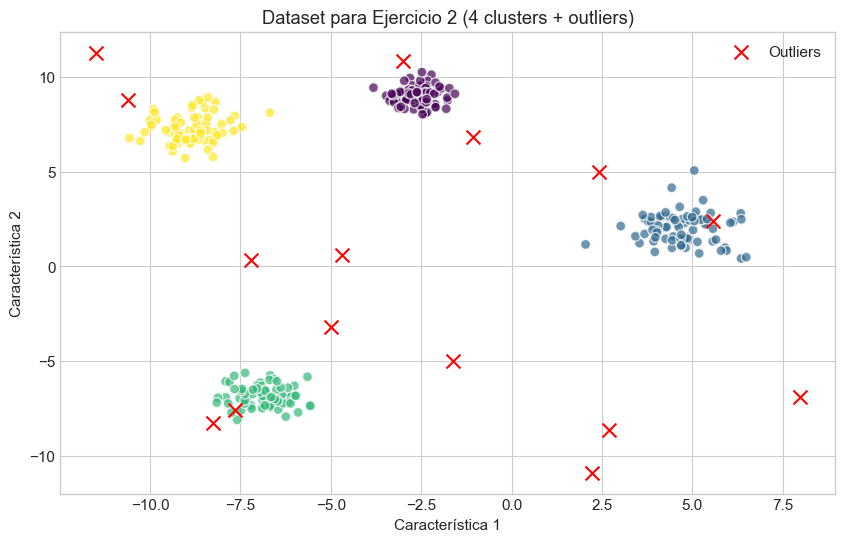

In [11]:
# Generar dataset con estructura clara
X_ej2, y_ej2 = make_blobs(
    n_samples=300,
    centers=4,
    cluster_std=[0.5, 0.8, 0.6, 0.7],
    random_state=RANDOM_STATE
)

# Añadir algunos outliers
outliers = np.random.uniform(low=-12, high=12, size=(15, 2))
X_ej2_noisy = np.vstack([X_ej2, outliers])
y_ej2_noisy = np.hstack([y_ej2, [-1]*15])

plt.figure(figsize=(10, 6))
plt.scatter(X_ej2_noisy[:300, 0], X_ej2_noisy[:300, 1], c=y_ej2, cmap='viridis',
            edgecolors='w', s=50, alpha=0.7)
plt.scatter(X_ej2_noisy[300:, 0], X_ej2_noisy[300:, 1], c='red', marker='x',
            s=100, label='Outliers')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Dataset para Ejercicio 2 (4 clusters + outliers)')
plt.legend()
plt.show()

### Tarea 2.1: Implementar la Función k-Distance

Implemente una función que calcule y grafique las k-distancias ordenadas.

In [21]:
k=5
X=X_ej2_noisy.copy()
nn=NearestNeighbors(
        n_neighbors=k,
        metric="euclidean")  
nn.fit(X)

distancias, indices= nn.kneighbors(X)

distancias_k= distancias[:, k-1]
print(pd.DataFrame(distancias).to_string())


       0         1         2         3         4
0    0.0  0.093648  0.159491  0.160429  0.198177
1    0.0  0.163453  0.183862  0.263119  0.266941
2    0.0  0.006744  0.156523  0.303913  0.361714
3    0.0  0.078598  0.103871  0.126793  0.230837
4    0.0  0.337558  0.474292  0.793219  0.854984
5    0.0  0.070899  0.138743  0.176239  0.188054
6    0.0  0.203320  0.203754  0.226536  0.264710
7    0.0  0.106382  0.120950  0.167113  0.192799
8    0.0  0.080618  0.132136  0.140257  0.151833
9    0.0  0.169334  0.202328  0.216331  0.228840
10   0.0  0.219292  0.317393  0.403786  0.450399
11   0.0  0.082788  0.146516  0.251337  0.251906
12   0.0  0.028494  0.060190  0.119187  0.276639
13   0.0  0.152895  0.170207  0.224555  0.253786
14   0.0  0.104533  0.120348  0.163453  0.266938
15   0.0  0.040697  0.053802  0.069200  0.102028
16   0.0  0.109763  0.327469  0.347929  0.394452
17   0.0  0.672014  0.765781  0.780468  0.799288
18   0.0  0.086325  0.117144  0.123903  0.181370
19   0.0  0.296542  

In [23]:
def calcular_k_distance(X, k):
    """
    Calcula la distancia al k-ésimo vecino más cercano para cada punto.

    Parámetros:
    -----------
    X : array-like de forma (n_samples, n_features)
        Datos de entrada.
    k : int
        Número de vecinos a considerar.

    Retorna:
    --------
    k_distances : array de forma (n_samples,)
        Distancias al k-ésimo vecino, ordenadas de menor a mayor.
    """
    # TODO: Implementar la función
    # 1. Crear un objeto NearestNeighbors con n_neighbors=k
    # 2. Ajustar a los datos X
    # 3. Obtener las distancias con kneighbors
    # 4. Extraer la distancia al k-ésimo vecino (última columna)
    # 5. Ordenar de menor a mayor

    # Su código aquí
    nn= NearestNeighbors(
        n_neighbors=k + 1, # +1 para incluir el self
        metric="euclidean"
    )  
    nn.fit(X)
    
    distancias, indices= nn.kneighbors(X)
     # k-ésimo vecino REAL
    distancia_k=distancias[:,k]

    distancias_k_ordenadas=np.sort(distancia_k)

    return distancias_k_ordenadas

# Verificar la función
k = 5
k_dist = calcular_k_distance(X_ej2_noisy, k)
if k_dist is not None:
    print(f"k-distances calculadas: {len(k_dist)} valores")
    print(f"Rango: [{k_dist.min():.3f}, {k_dist.max():.3f}]")

k-distances calculadas: 315 valores
Rango: [0.120, 8.573]


In [29]:
print(pd.DataFrame(k_dist).to_string())

            0
0    0.119611
1    0.132136
2    0.140978
3    0.147740
4    0.147758
5    0.149156
6    0.154111
7    0.154488
8    0.158123
9    0.160170
10   0.165363
11   0.166636
12   0.173365
13   0.173365
14   0.173996
15   0.175311
16   0.176346
17   0.177453
18   0.183629
19   0.188054
20   0.189718
21   0.191834
22   0.191881
23   0.191884
24   0.192160
25   0.192383
26   0.192799
27   0.197754
28   0.199036
29   0.200161
30   0.203264
31   0.203744
32   0.206156
33   0.207894
34   0.208253
35   0.208253
36   0.208519
37   0.210477
38   0.211705
39   0.213226
40   0.213226
41   0.213420
42   0.216292
43   0.217738
44   0.220116
45   0.221768
46   0.222390
47   0.222775
48   0.223524
49   0.223560
50   0.223779
51   0.224332
52   0.224332
53   0.224555
54   0.224976
55   0.225183
56   0.226043
57   0.226540
58   0.227588
59   0.227588
60   0.227960
61   0.228741
62   0.230953
63   0.231817
64   0.232266
65   0.232739
66   0.234242
67   0.234402
68   0.236285
69   0.236285
70   0

### Tarea 2.2: Graficar k-Distance y Encontrar el Codo

Genere el gráfico de k-distancias e identifique el punto de inflexión (codo).

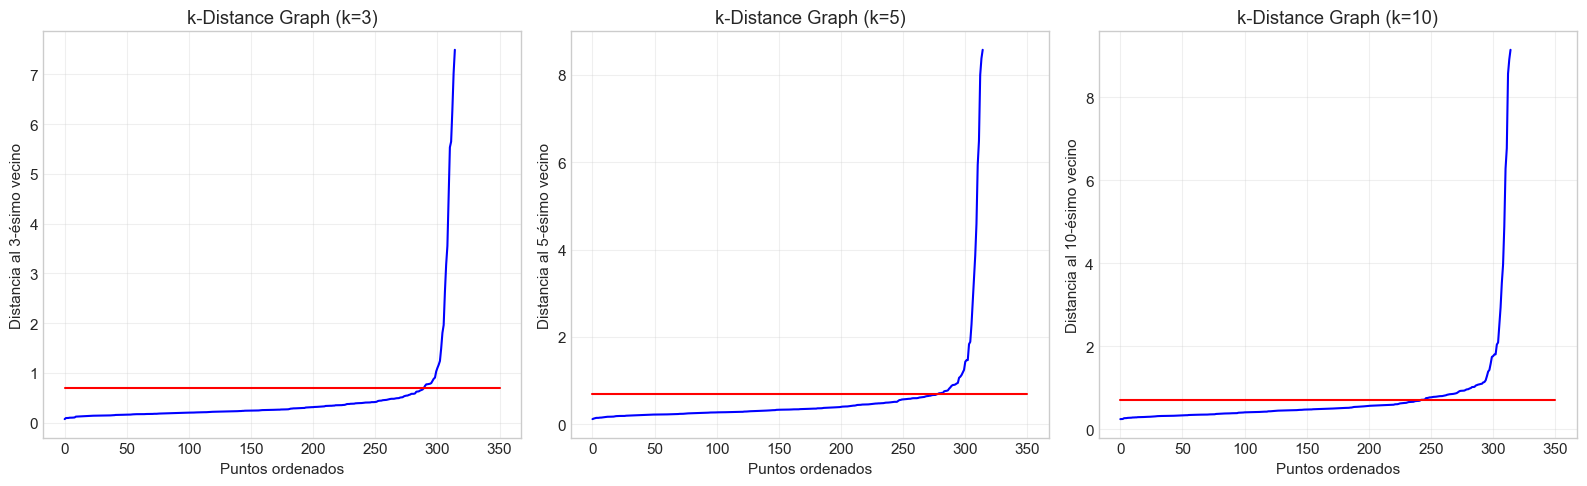

In [39]:
# TODO: Graficar k-distance para diferentes valores de k
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
axes=axes.flatten()

k_values = [3, 5, 10]

for idx, k in enumerate(k_values):
    ax=axes[idx]

    # TODO: Calcular k-distances y graficar
    # Su código aquí
    k_dist = calcular_k_distance(X_ej2_noisy, k)
    ax.plot(k_dist, color="blue")
    ax.set_xlabel('Puntos ordenados')
    ax.plot([0, 350], [0.7, 0.7], color="red")
    ax.set_ylabel(f'Distancia al {k}-ésimo vecino')
    ax.set_title(f'k-Distance Graph (k={k})')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Tarea 2.3: Aplicar DBSCAN con el eps Seleccionado

Use el valor de eps identificado en el gráfico anterior.

In [61]:
eps_optimo=0.7

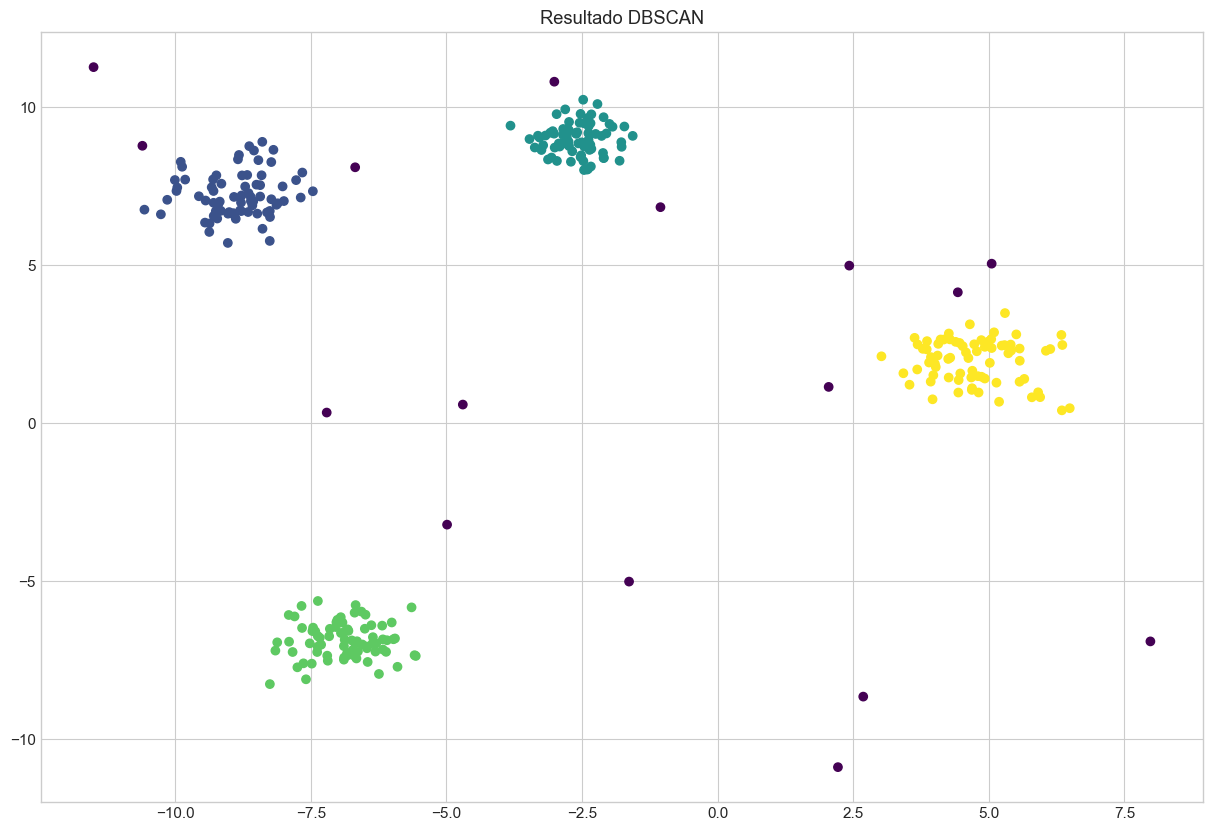

In [63]:
# TODO: Aplicar DBSCAN con el eps identificado
# Pruebe con el valor del codo que identificó

eps_optimo =0.7 # Reemplazar con su valor
min_samples = 2

    # Su código aquí
db=DBSCAN(eps=eps_optimo, min_samples=min_samples)
labels=db.fit_predict(X_ej2_noisy)

plt.figure(figsize=(15,10))
plt.scatter(X_ej2_noisy[:,0], X_ej2_noisy[:,1], c=labels, cmap='viridis')
plt.title("Resultado DBSCAN")
plt.show()

### Pregunta de Reflexión 2

Analice el proceso de selección de parámetros:

1. ¿El valor de eps identificado permitió detectar correctamente los 4 clusters?
2. ¿Cuántos outliers fueron detectados? ¿Coincide con los 15 que añadimos?
3. ¿Cómo afecta el valor de k a la forma de la curva y al eps sugerido?

*Escriba su respuesta aquí:*

...

---

## Ejercicio 3: Comparación de Algoritmos en Estructuras No Convexas

### Contexto

Una ventaja clave de los métodos basados en densidad es su capacidad para detectar clusters de forma arbitraria. Compare el rendimiento de K-Means, DBSCAN y HDBSCAN.

### Datos

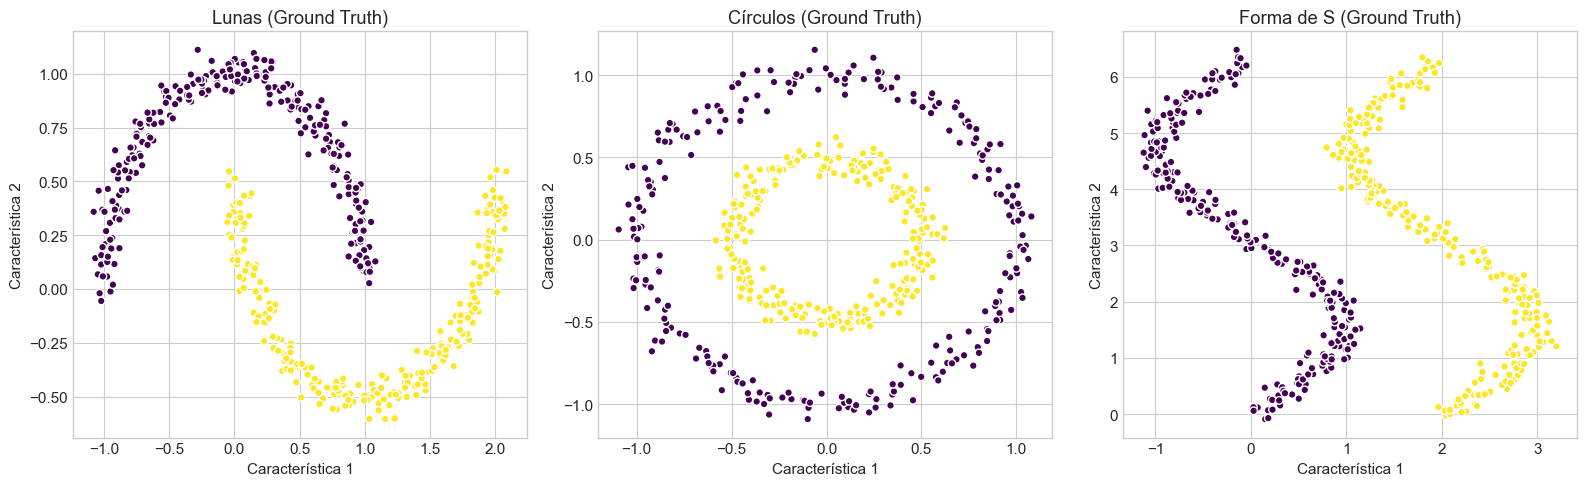

In [66]:
# Generar datasets con diferentes estructuras
n_samples = 500

# Dataset 1: Lunas
X_lunas, y_lunas = make_moons(n_samples=n_samples, noise=0.05, random_state=RANDOM_STATE)

# Dataset 2: Círculos concéntricos
X_circulos, y_circulos = make_circles(n_samples=n_samples, noise=0.05, factor=0.5,
                                       random_state=RANDOM_STATE)

# Dataset 3: Forma de S con ruido
t = np.linspace(0, 2*np.pi, n_samples//2)
x1 = np.sin(t) + np.random.normal(0, 0.1, len(t))

y1 = t + np.random.normal(0, 0.1, len(t))

x2 = np.sin(t) + 2 + np.random.normal(0, 0.1, len(t))

y2 = t + np.random.normal(0, 0.1, len(t))

X_s = np.vstack([np.column_stack([x1, y1]), np.column_stack([x2, y2])])

y_s = np.array([0]*len(t) + [1]*len(t))

# Visualización
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
datasets = [(X_lunas, y_lunas, 'Lunas'), (X_circulos, y_circulos, 'Círculos'),
            (X_s, y_s, 'Forma de S')]

for ax, (X, y, titulo) in zip(axes, datasets):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='w', s=30)
    ax.set_title(f'{titulo} (Ground Truth)')
    ax.set_xlabel('Característica 1')
    ax.set_ylabel('Característica 2')

plt.tight_layout()
plt.show()

### Tarea 3.1: Aplicar K-Means a Cada Dataset

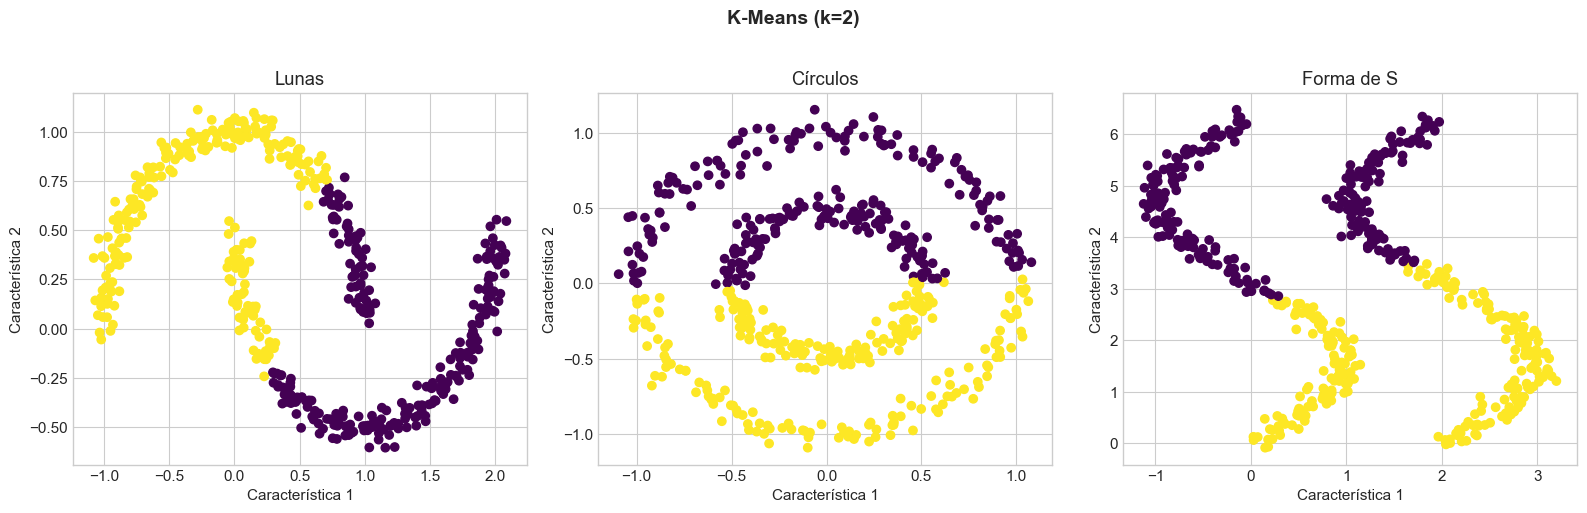

In [ ]:
# TODO: Aplicar K-Means (k=2) a cada dataset y calcular ARI
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
axes=axes.flatten()

resultados_kmeans = {}

for idx, (X, y_true, titulo) in enumerate(datasets):
    ax = axes[idx]

    # TODO: Aplicar K-Means
    # Su código aquí
    km=KMeans(n_clusters=2,
              max_iter=300,
              random_state=42
              )
    y_pred=km.fit_predict(X)

    resultados_kmeans[titulo]=adjusted_rand_score(y_true, y_pred)
    ax.scatter(X[:,0], X[:,1], c=y_pred, cmap='viridis')
    ax.set_title(f'{titulo}')
    ax.set_xlabel('Característica 1')
    ax.set_ylabel('Característica 2')

plt.suptitle('K-Means (k=2)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### Tarea 3.2: Aplicar DBSCAN con Parámetros Apropiados

Lunas
Círculos
Forma de S


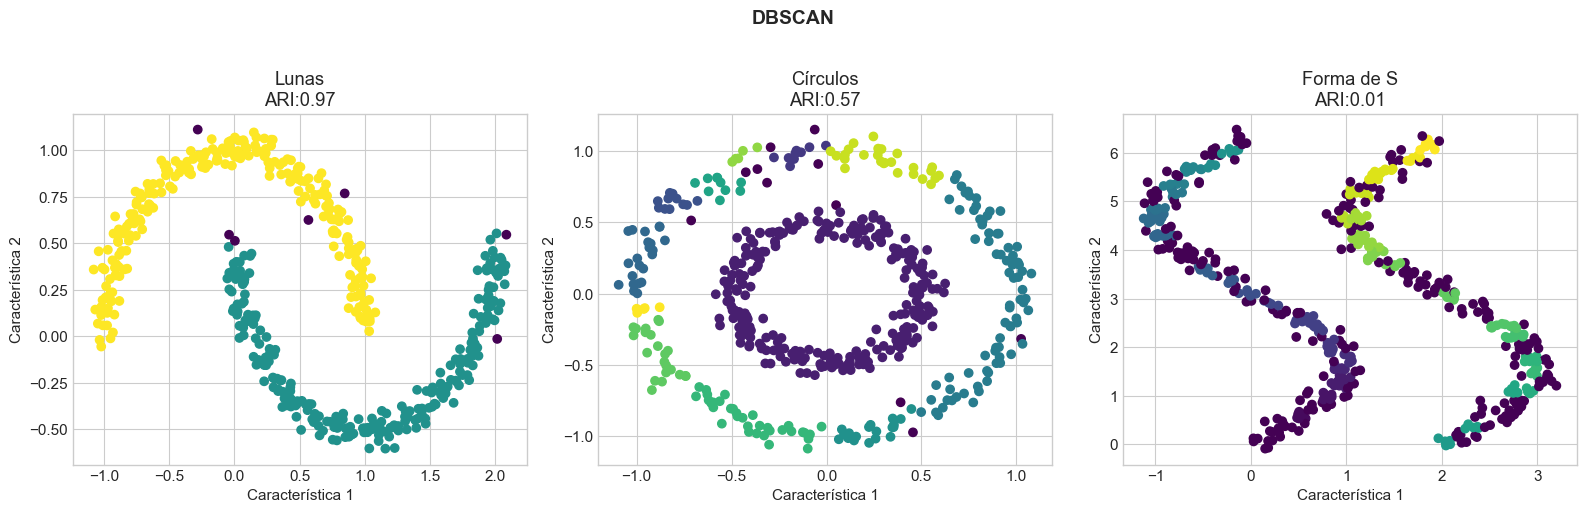

In [108]:
# TODO: Aplicar DBSCAN a cada dataset
# Seleccione eps apropiado para cada uno (puede usar k-distance)

# Parámetros sugeridos para explorar:
# Lunas: eps entre 0.1 y 0.3
# Círculos: eps entre 0.1 y 0.3
# Forma S: eps entre 0.2 y 0.5

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
axes= axes.flatten()
# TODO: Definir parámetros para cada dataset
params_dbscan = [
    {'eps': 0.1, 'min_samples': 5},  # Lunas - Reemplazar eps
      # Círculos - Reemplazar eps
    # {'eps': 0.2, 'min_samples': 5}
    # {'eps': 0.5, 'min_samples': 5}   # Forma S - Reemplazar eps
]

resultados_dbscan = {}

for idx, (X, y_true, titulo) in enumerate(datasets):
    ax = axes[idx]
    print(titulo)
    # TODO: Aplicar DBSCAN con los parámetros definidos
    # Su código aquí
    for x in params_dbscan:
        db=DBSCAN(eps=x[eps], min_samples=x[min_samples])
        y_pred=db.fit_predict(X)
        resultados_dbscan[titulo]=adjusted_rand_score(y_true, y_pred)
        ax.scatter(X[:,0], X[:,1], c=y_pred, cmap="viridis")
        ax.set_title(f'{titulo}\nARI:{resultados_dbscan[titulo]:.2f}')
        ax.set_xlabel('Característica 1')
        ax.set_ylabel('Característica 2')

 

plt.suptitle('DBSCAN', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [96]:
print(resultados_dbscan)

{'Lunas': 1.0, 'Círculos': 1.0, 'Forma de S': 0.9960079680637445}


### Tarea 3.3: Aplicar HDBSCAN

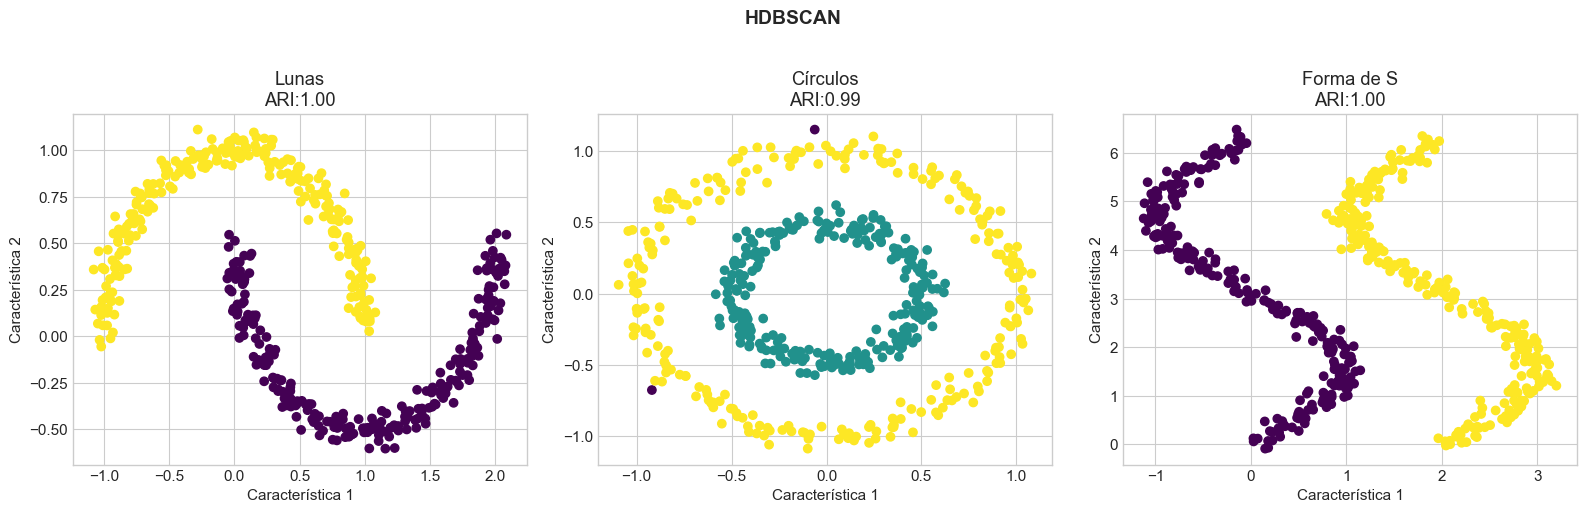

In [105]:
from sklearn.cluster import HDBSCAN
# TODO: Aplicar HDBSCAN a cada dataset
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

resultados_hdbscan = {}

for idx, (X, y_true, titulo) in enumerate(datasets):
    ax = axes[idx]

    # TODO: Aplicar HDBSCAN con min_cluster_size=15
    # Su código aquí
    hdb=HDBSCAN(min_cluster_size=15)
    y_pred=hdb.fit_predict(X)
    resultados_hdbscan[titulo]=adjusted_rand_score(y_true, y_pred)
    ax.scatter(X[:, 0], X[:,1], c=y_pred, cmap="viridis")
    ax.set_title(f'{titulo}\nARI:{resultados_hdbscan[titulo]:.2f}')
    ax.set_xlabel('Característica 1')
    ax.set_ylabel('Característica 2')

plt.suptitle('HDBSCAN', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### Tarea 3.4: Tabla Comparativa de Resultados

In [ ]:
# TODO: Crear una tabla comparativa con los ARI de cada algoritmo

# Su código aquí para generar la tabla
# Formato sugerido:
# Dataset     | K-Means | DBSCAN | HDBSCAN
# Lunas       |   xxx   |  xxx   |   xxx
# Círculos    |   xxx   |  xxx   |   xxx
# Forma S     |   xxx   |  xxx   |   xxx

### Pregunta de Reflexión 3

Basándose en los resultados:

1. ¿Qué algoritmo tuvo mejor rendimiento general? ¿Por qué?
2. ¿En qué dataset K-Means tuvo peor rendimiento? Explique la razón.
3. ¿HDBSCAN requirió ajuste de parámetros? ¿Es esto una ventaja o desventaja?

*Escriba su respuesta aquí:*

...

---

## Ejercicio 4: HDBSCAN - Características Avanzadas

### Contexto

HDBSCAN proporciona información adicional como probabilidades de pertenencia y outlier scores. Explore estas características.

### Datos

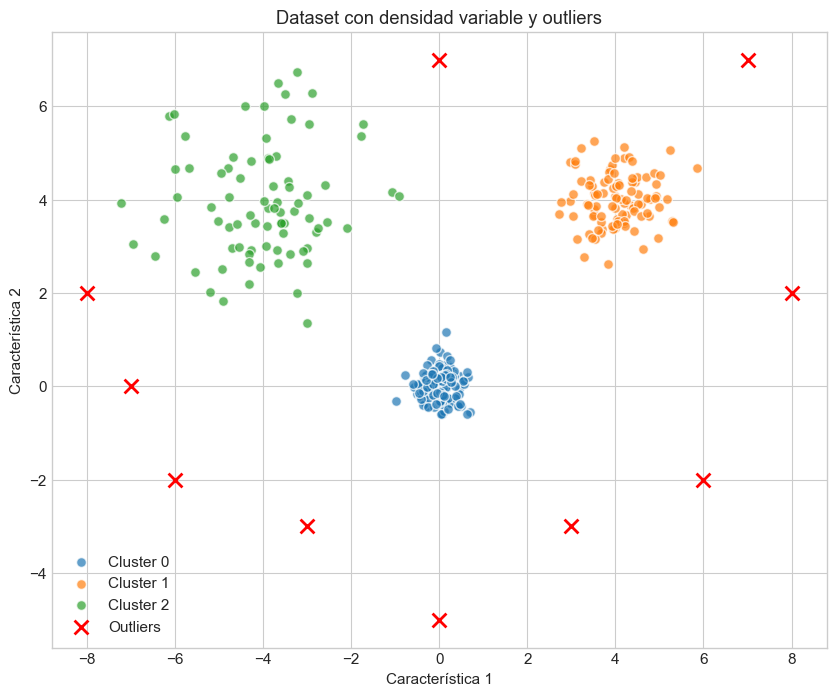

In [109]:
# Dataset con clusters de diferente densidad y outliers
np.random.seed(RANDOM_STATE)

# Cluster denso
cluster_denso = np.random.randn(150, 2) * 0.3 + np.array([0, 0])

# Cluster medio
cluster_medio = np.random.randn(100, 2) * 0.6 + np.array([4, 4])

# Cluster disperso
cluster_disperso = np.random.randn(80, 2) * 1.2 + np.array([-4, 4])

# Outliers
outliers = np.array([
    [6, -2], [-6, -2], [0, 7], [7, 7], [-7, 0],
    [3, -3], [-3, -3], [8, 2], [-8, 2], [0, -5]
])

X_ej4 = np.vstack([cluster_denso, cluster_medio, cluster_disperso, outliers])
y_ej4 = np.array([0]*150 + [1]*100 + [2]*80 + [-1]*10)

plt.figure(figsize=(10, 8))
for label in [0, 1, 2]:
    mask = y_ej4 == label
    plt.scatter(X_ej4[mask, 0], X_ej4[mask, 1], label=f'Cluster {label}',
                edgecolors='w', s=50, alpha=0.7)
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', s=100,
            label='Outliers', linewidths=2)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Dataset con densidad variable y outliers')
plt.legend()
plt.show()

### Tarea 4.1: Aplicar HDBSCAN y Extraer Probabilidades

In [129]:
# TODO: Aplicar HDBSCAN y extraer probabilidades y outlier scores
from sklearn.cluster import HDBSCAN
# Su código aquí
clusterer = HDBSCAN(min_cluster_size=15)  # Reemplazar
labels_hdb = clusterer.fit_predict(X_ej4)  # Reemplazar
probs  = clusterer.probabilities_ # Reemplazar (clusterer.probabilities_)
 # Reemplazar (clusterer.outlier_scores_)

if labels_hdb is not None:
    unique_clusters=set(labels_hdb)
    n_clusters = sum(1 for i in unique_clusters if i!=-1) # set me devuelve la cantidad unica de clusteres y 
    n_ruido = sum(1 for x in labels_hdb if x ==-1)
    print(f"Clusters encontrados: {n_clusters}")
    print(f"Puntos de ruido: {n_ruido}")

Clusters encontrados: 3
Puntos de ruido: 11


In [131]:
print(probs.shape)

(340,)


### Tarea 4.2: Visualizar Probabilidades de Pertenencia

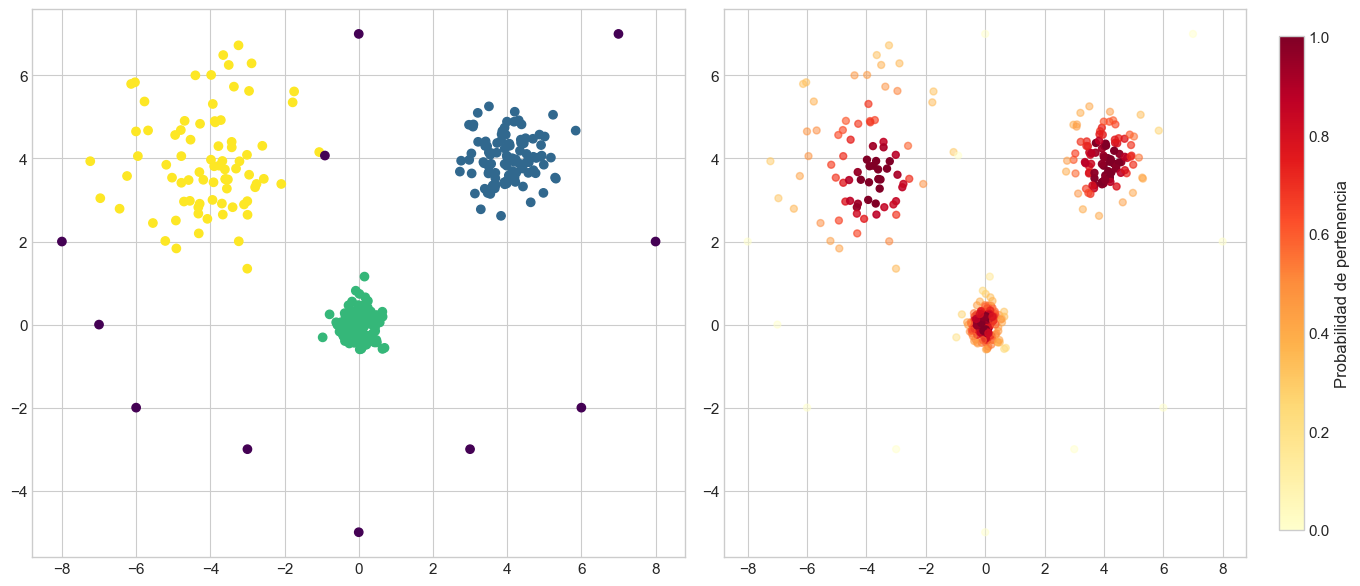

In [142]:
# TODO: Crear visualización de probabilidades
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Clusters coloreados
ax = axes[0]
# Su código aquí
ax.scatter(X_ej4[:,0], X_ej4[:,1], c=labels_hdb, cmap="viridis", label=f"{set(labels_hdb)}")
# Subplot 2: Probabilidades de pertenencia
ax = axes[1]
# Su código aquí (usar colormap para mostrar probabilidades)
sc= ax.scatter(X_ej4[:,0], X_ej4[:,1], c=probs, cmap='YlOrRd', alpha=np.clip(probs, 0.5, 1.0), s=25)
# ──── Esto es lo que agrega la barra de color ────
cbar = plt.colorbar(sc, ax=ax, shrink=0.9)   # shrink opcional para que no sea tan larga
cbar.set_label('Probabilidad de pertenencia', fontsize=12)
# cbar.ax.set_ylabel('Probabilidad', rotation=270, va='bottom')  # alternativa

plt.tight_layout()
plt.show()

### Tarea 4.3: Análisis de Outlier Scores

In [ ]:
# TODO: Identificar los puntos con mayor outlier score
# Compare con los outliers reales

if outlier_scores is not None:
    # TODO: Encontrar los 10 puntos con mayor outlier score
    # Su código aquí

    # Visualizar
    fig, ax = plt.subplots(figsize=(10, 8))
    # Su código aquí

    plt.show()

### Pregunta de Reflexión 4

Analice las características de HDBSCAN:

1. ¿Las probabilidades de pertenencia son más bajas en los bordes de los clusters? ¿Por qué?
2. ¿HDBSCAN detectó correctamente los 10 outliers? ¿Hubo falsos positivos o negativos?
3. ¿Cómo podría usar los outlier scores en una aplicación de detección de fraude?

*Escriba su respuesta aquí:*

...

---

## Ejercicio 5: Caso Práctico - Segmentación de Clientes

### Contexto

Aplique métodos basados en densidad a un problema de segmentación de clientes usando datos de comportamiento de compra.

### Datos

In [ ]:
# Simular datos de clientes
np.random.seed(RANDOM_STATE)

n_clientes = 400

# Segmento 1: Clientes frecuentes de bajo gasto
seg1_frecuencia = np.random.normal(25, 3, 100)  # Visitas/mes
seg1_gasto = np.random.normal(50, 10, 100)       # Gasto promedio

# Segmento 2: Clientes ocasionales de alto gasto
seg2_frecuencia = np.random.normal(5, 2, 120)
seg2_gasto = np.random.normal(200, 30, 120)

# Segmento 3: Clientes premium (alta frecuencia, alto gasto)
seg3_frecuencia = np.random.normal(20, 4, 80)
seg3_gasto = np.random.normal(300, 40, 80)

# Segmento 4: Clientes inactivos (cluster disperso)
seg4_frecuencia = np.random.normal(2, 1.5, 80)
seg4_gasto = np.random.normal(30, 20, 80)

# Clientes anómalos
anomalos_frecuencia = np.array([40, 1, 35, 50, 0.5])
anomalos_gasto = np.array([500, 600, 20, 400, 450])

# Combinar datos
frecuencia = np.concatenate([seg1_frecuencia, seg2_frecuencia, seg3_frecuencia,
                             seg4_frecuencia, anomalos_frecuencia])
gasto = np.concatenate([seg1_gasto, seg2_gasto, seg3_gasto, seg4_gasto, anomalos_gasto])

# Asegurar valores positivos
frecuencia = np.clip(frecuencia, 0.1, None)
gasto = np.clip(gasto, 10, None)

# Crear DataFrame
df_clientes = pd.DataFrame({
    'frecuencia_mensual': frecuencia,
    'gasto_promedio': gasto,
    'segmento_real': [0]*100 + [1]*120 + [2]*80 + [3]*80 + [-1]*5
})

print(f"Dataset: {len(df_clientes)} clientes")
print(f"\nEstadísticas descriptivas:")
print(df_clientes[['frecuencia_mensual', 'gasto_promedio']].describe())

### Tarea 5.1: Preprocesamiento y Exploración

In [ ]:
# TODO: Estandarizar los datos y visualizar

# Su código aquí
scaler = StandardScaler()
X_clientes = None  # Reemplazar

# Visualización
if X_clientes is not None:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Datos originales
    ax = axes[0]
    # Su código aquí

    # Datos estandarizados
    ax = axes[1]
    # Su código aquí

    plt.tight_layout()
    plt.show()

### Tarea 5.2: Selección de Parámetros para DBSCAN

In [ ]:
# TODO: Usar k-distance para determinar eps

# Su código aquí

### Tarea 5.3: Aplicar y Comparar Algoritmos

In [ ]:
# TODO: Aplicar K-Means, DBSCAN y HDBSCAN
# Comparar resultados

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Ground Truth
ax = axes[0, 0]
# Su código aquí

# K-Means
ax = axes[0, 1]
# Su código aquí

# DBSCAN
ax = axes[1, 0]
# Su código aquí

# HDBSCAN
ax = axes[1, 1]
# Su código aquí

plt.tight_layout()
plt.show()

### Tarea 5.4: Perfilado de Segmentos

In [ ]:
# TODO: Crear perfiles de los segmentos encontrados por HDBSCAN
# Calcular estadísticas por segmento

# Su código aquí

### Pregunta de Reflexión 5

Analice los resultados de la segmentación:

1. ¿Qué algoritmo identificó mejor los segmentos de clientes? ¿Por qué?
2. ¿Se detectaron correctamente los clientes anómalos? ¿Qué caracteriza a estos clientes?
3. ¿Cómo describiría cada segmento en términos de negocio? ¿Qué estrategias de marketing sugeriría?

*Escriba su respuesta aquí:*

...

---

## Ejercicio 6: Sensibilidad a la Dimensionalidad

### Contexto

Los métodos basados en densidad pueden verse afectados por la alta dimensionalidad. Explore este fenómeno.

### Datos

In [ ]:
# Generar datos en diferentes dimensionalidades
def generar_datos_nd(n_samples, n_features, n_clusters, random_state=42):
    """Genera datos con clusters en n dimensiones."""
    X, y = make_blobs(n_samples=n_samples, n_features=n_features,
                      centers=n_clusters, random_state=random_state)
    return X, y

# Crear datasets de diferentes dimensionalidades
dimensiones = [2, 5, 10, 20, 50]
datasets_dim = {}

for d in dimensiones:
    X, y = generar_datos_nd(n_samples=300, n_features=d, n_clusters=3)
    datasets_dim[d] = (X, y)
    print(f"Dimensión {d}: {X.shape}")

### Tarea 6.1: Analizar Distribución de Distancias

In [ ]:
# TODO: Calcular y visualizar la distribución de distancias en cada dimensión
from scipy.spatial.distance import pdist

fig, axes = plt.subplots(1, len(dimensiones), figsize=(18, 4))

for idx, d in enumerate(dimensiones):
    ax = axes[idx]
    X, _ = datasets_dim[d]

    # TODO: Calcular distancias y graficar histograma
    # Su código aquí

    ax.set_title(f'd = {d}')
    ax.set_xlabel('Distancia')

axes[0].set_ylabel('Frecuencia')
plt.suptitle('Distribución de distancias por dimensionalidad', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Tarea 6.2: Rendimiento de DBSCAN vs Dimensionalidad

In [ ]:
# TODO: Aplicar DBSCAN a cada dataset y medir rendimiento
# Use un eps fijo y observe cómo cambia el resultado

resultados_dim = []

for d in dimensiones:
    X, y_true = datasets_dim[d]

    # TODO: Aplicar DBSCAN
    # Calcular ARI y número de clusters/ruido

    # Su código aquí
    pass

# Mostrar resultados en tabla

### Pregunta de Reflexión 6

Analice el efecto de la dimensionalidad:

1. ¿Cómo cambia la distribución de distancias al aumentar la dimensionalidad?
2. ¿Por qué DBSCAN tiene problemas en alta dimensionalidad?
3. ¿Qué estrategias podría usar para aplicar clustering basado en densidad a datos de alta dimensionalidad?

*Escriba su respuesta aquí:*

...

---

## Referencias

- Ester, M., Kriegel, H. P., Sander, J., & Xu, X. (1996). A density-based algorithm for discovering clusters in large spatial databases with noise. *KDD*, 96(34), 226-231.
- Campello, R. J., Moulavi, D., & Sander, J. (2013). Density-based clustering based on hierarchical density estimates. *PAKDD*, 160-172.
- Scikit-learn documentation: https://scikit-learn.org/stable/modules/clustering.html
- HDBSCAN documentation: https://hdbscan.readthedocs.io/

---



# EOF (End Of File)